In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [ ]:
   from google.colab import files
   uploaded = files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Loading the dataset

In [ ]:
df=pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Univariate

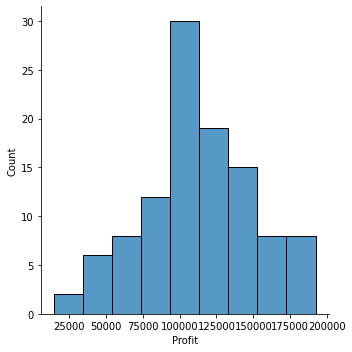

In [ ]:
sns.displot(df.Profit)

# Bivariate

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


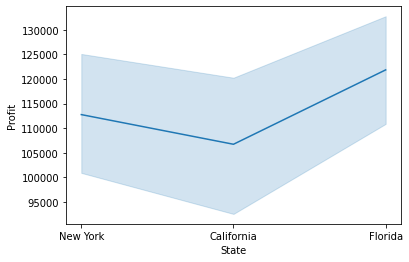

In [ ]:
sns.lineplot(df.State,df.Profit)

# Multivariate

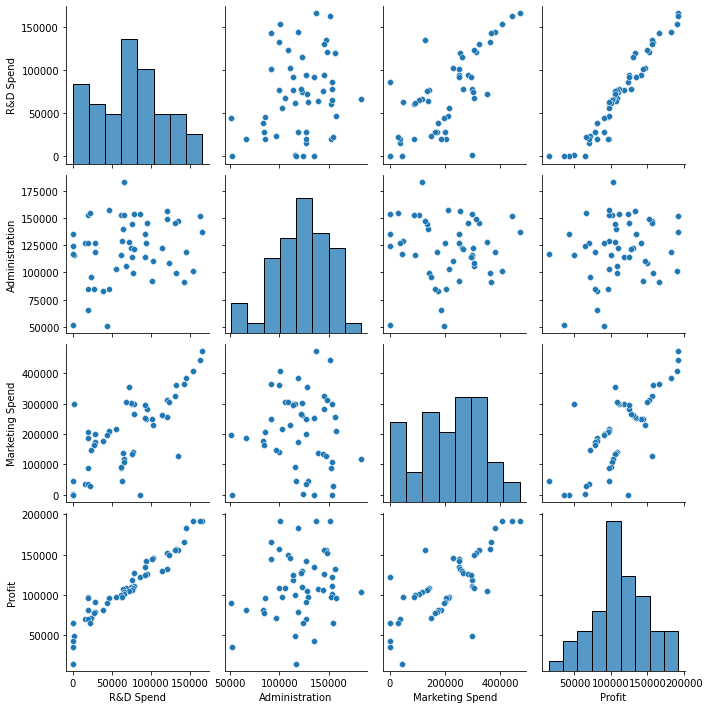

In [ ]:
sns.pairplot(df)

# Perform descriptive statistics

In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,108.000000,108.000000,108.000000,108.000000
mean,74959.338704,121750.788889,214952.664722,113523.760000
std,44996.368152,27322.385654,117937.942120,38991.013654
min,0.000000,51283.140000,0.000000,14681.400000
25%,38558.510000,105077.645000,134050.070000,90708.190000
50%,75791.365000,122699.795000,239452.750000,109543.120000
75%,101913.080000,145077.580000,298664.470000,141585.520000
max,165349.200000,182645.560000,471784.100000,192261.830000


# Handle the missing values

In [ ]:
df.isnull().any

<bound method NDFrame._add_numeric_operations.<locals>.any of      R&D Spend  Administration  Marketing Spend  State  Profit
0        False           False            False  False   False
1        False           False            False  False   False
2        False           False            False  False   False
3        False           False            False  False   False
4        False           False            False  False   False
..         ...             ...              ...    ...     ...
103      False           False            False  False   False
104      False           False            False  False   False
105      False           False            False  False   False
106      False           False            False  False   False
107      False           False            False  False   False

[108 rows x 5 columns]>

# Find the outliers and replace it

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


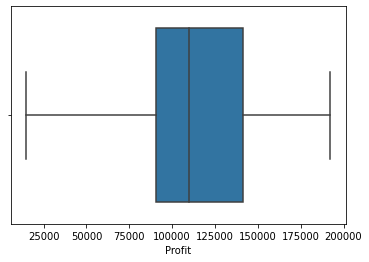

In [ ]:
sns.boxplot(df.Profit)

# Check the categorical columns and perform encoding

In [ ]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [ ]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [ ]:
obj_df[obj_df.isnull().any(axis=1)]

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
27,dodge,gas,turbo,NaN,sedan,fwd,front,ohc,four,mpfi
63,mazda,diesel,std,NaN,sedan,fwd,front,ohc,four,idi


In [ ]:
obj_df["num_doors"].value_counts()

four    114
two      89
Name: num_doors, dtype: int64

# Scale the independent variables

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame(data=[[19, 19000], [35, 20000], [26, 50000], [27, 90000]], 
                  columns=['x1', 'x2'])

sc = StandardScaler()
sc.fit(df)

print(sc.mean_)

[2.675e+01 4.475e+04]


# Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y)
X_train


array([[76253.86, 113867.3, 298664.47, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 294919.57, 'Florida'],
       [77044.01, 99281.34, 140574.81, 'New York'],
       [61136.38, 152701.92, 88218.23, 'New York'],
       [67532.53, 105751.03, 304768.73, 'Florida'],
       [86419.7, 153514.11, 0.0, 'New York'],
       [72107.6, 127864.55, 353183.81, 'New York'],
       [55493.95, 103057.49, 214634.81, 'Florida'],
       [165349.2, 136897.8, 471784.1, 'New York'],
       [44069.95, 51283.14, 197029.42, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [44069.95, 51283.14, 197029.42, 'California'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [64664.71, 139553.16, 137962.62, 'California'],

In [ ]:
X_test

array([[134615.46, 147198.87, 127716.82, 'California'],
       [55493.95, 103057.49, 214634.81, 'Florida'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [1000.23, 124153.04, 1903.93, 'New York'],
       [23640.93, 96189.63, 148001.11, 'California'],
       [0.0, 135426.92, 0.0, 'California'],
       [66051.52, 182645.56, 118148.2, 'Florida'],
       [46426.07, 157693.92, 210797.67, 'New York'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [22177.74, 154806.14, 28334.72, 'California'],
       [15505.73, 127382.3, 35534.17, 'New York'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [20229.59, 85047.44, 205517.64, 'New York'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [66051.52, 182645.56, 118148.2, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [22177.74, 154806.14, 28334.72, 'California'],
       [61994.48, 115641.28, 91131.24, 'Florida'],
       [

In [ ]:
y_train

array([118474.03, 132602.65, 125370.37, 124266.9 , 108552.04,  97483.56,
       108733.99, 122776.86, 105008.31,  96778.92, 192261.83,  89949.14,
       132602.65, 126992.93, 146121.95, 155752.6 ,  89949.14, 126992.93,
       107404.34, 156122.51, 182901.99, 182901.99, 144259.4 , 152211.77,
        81005.76, 166187.94,  49490.75,  69758.98,  64926.08, 141585.52,
       129917.04,  81229.06, 101004.64, 134307.35, 191050.39, 141585.52,
       110352.25, 126992.93, 124266.9 , 134307.35,  99937.59,  81005.76,
       122776.86, 146121.95, 149759.96,  81229.06, 156991.12,  49490.75,
       134307.35, 108552.04,  90708.19, 110352.25,  96712.8 ,  35673.41,
        90708.19, 191792.06, 149759.96,  71498.49, 144259.4 , 118474.03,
        42559.73, 166187.94, 144259.4 , 111313.02, 108733.99, 125370.37,
        78239.91, 129917.04, 111313.02, 191792.06, 124266.9 ,  97427.84,
        77798.83, 141585.52,  14681.4 , 155752.6 , 107404.34, 105008.31,
        97483.56,  96479.51,  77798.83])

In [ ]:
y_test

array([156122.51,  96778.92, 125370.37,  64926.08,  71498.49,  42559.73,
       103282.38,  96712.8 , 152211.77, 191050.39,  65200.33,  69758.98,
       132602.65,  96479.51, 156991.12, 103282.38, 129917.04,  65200.33,
        99937.59,  35673.41, 105733.54, 105733.54, 192261.83,  78239.91,
        14681.4 ,  97427.84, 101004.64])